**Creating csv**

In [6]:
import pandas as pd
import numpy as np
import os

class calibration:
    def __init__(self, path):
        self.path = path
        self.dP = np.array([])
        self.V = np.array([])
        self.read_data()
        self.calc_velocity()
        self.fit_polynomial()

    def read_data(self):
        csv_files = [file for file in os.listdir(self.path) if file.endswith(".csv")]
        for file in csv_files:
            file_path = os.path.join(self.path, file)
            df = pd.read_csv(file_path, sep=',')
            #df = pd.read_csv(file_path, sep=';')
            #df = df.replace(',', '.', regex=True)
            
            self.V = np.append(self.V,  round(np.mean(df.iloc[1:, 1].astype(float)),3))  # Get the second column

            p_val = ''
            for i in range(len(file)):
                if file[i] == '=':
                    while file[i+1] != '.':
                        if (file[i+1]==','):
                            p_val += '.'
                        else:
                            p_val += file[i+1]
                        i += 1
            self.dP = np.append(self.dP, float(p_val))  

    def calc_velocity(self):
        R = 287.052874
        T = 22.3 + 273.15
        Ps = 1032.63 * 10**2

        d1 = 100
        d2 = 47.33
        rho_a = Ps/(R*T)
        self.U = np.round( np.sqrt(2*(-self.dP) / rho_a  * 1/((d2/d1)**4-1) ),3)
    
    def fit_polynomial(self):
        self.coefficients = np.polyfit(self.V, self.U, 4)

    def save_coefficients(self, name):
        np.savetxt(name, self.coefficients)

**importing data**

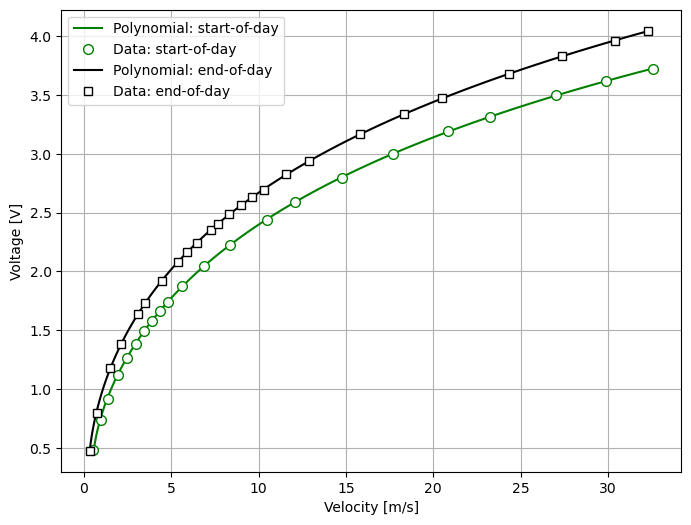

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cali_1 = calibration('Measurement\Data\Calibration1')
cali_2 = calibration('Measurement\Data\Calibration2')

cali_1.save_coefficients('Measurement\Data\Processed_data\polynomial_coefficients_cali1.csv')
cali_2.save_coefficients('Measurement\Data\Processed_data\polynomial_coefficients_cali2.csv')

# Generate voltage values for plotting
voltage_values1 = np.linspace(min(cali_1.V), max(cali_1.V), 100)
velocity_values1 = np.polyval(cali_1.coefficients, voltage_values1)

voltage_values2 = np.linspace(min(cali_2.V), max(cali_2.V), 100)
velocity_values2 = np.polyval(cali_2.coefficients, voltage_values2)


plt.figure(figsize=(8, 6))
plt.plot(velocity_values1, voltage_values1, color='green', label='Polynomial: start-of-day')
plt.plot(cali_1.U, cali_1.V, 'o', color='white', label='Data: start-of-day', markersize=7,markeredgecolor='green')

plt.plot(velocity_values2, voltage_values2, color='black', label='Polynomial: end-of-day')
plt.plot(cali_2.U, cali_2.V, 's', color='white', label='Data: end-of-day', markersize=6.2, markeredgecolor='black')




plt.xlabel('Velocity [m/s]')
plt.ylabel('Voltage [V]')
plt.legend()
plt.grid()
plt.show()

cali_2.save_coefficients('polynomial_coefficients.txt')

